<br>

# Parch & Posey

Parch & Posey is a Hypothetical Paper company with 50 sales representatives spread across the United States in four regions.

There are three types of paper
 - Regular
 - Poster
 - Glossy
 
They supply to a client that is a Fortune 100 company.

Using SQL, tricky business questions were answered.

An entity relationship diagram (ERD) is a common way to view data in a database. Below is the ERD for the database used from Parch & Posey. These diagrams helps to visualize the data you are analyzing including:

The names of the tables.
The columns in each table.
The way the tables work together.

In the Parch & Posey database there are five tables:

 - web_events
 - accounts
 - orders
 - sales_reps
 - region

The dataset was obtained in a text format, it was pasted in SQL Server Management Studio to create a database.

The tables in the created database were saved as CSV files giving two options of creating a SQLite database file.

The database file was created using SQL Server Management Studio and the read into a Jupyter Notebook.

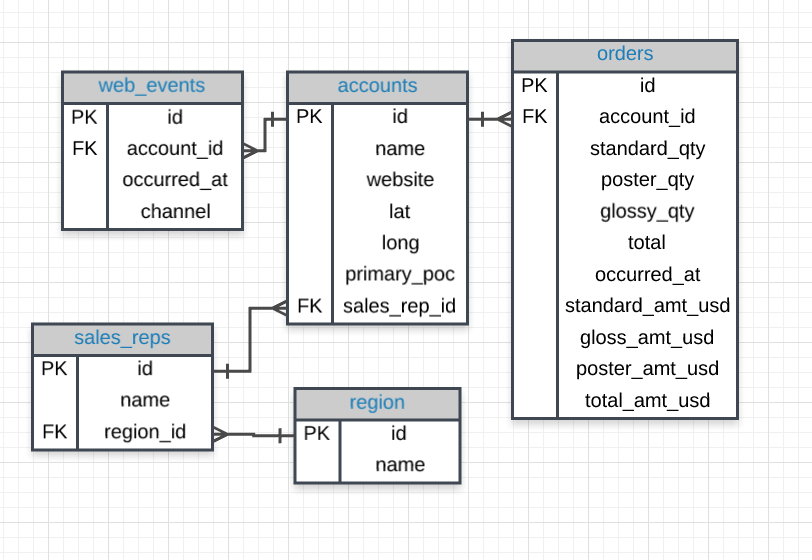

### Libraries

In [1]:
import pyodbc
import pandas as pd
import glob
import sqlite3

### Connecting to the SQLite db file

In [2]:
# Connect to or create the SQLite database

conn = sqlite3.connect('parch_and_posey.db')

In [3]:
%load_ext sql

In [4]:
%sql sqlite:///parch_and_posey.db

### Tables in the database

In [5]:
%%sql

SELECT name FROM sqlite_master WHERE type IN ('table', 'view') AND name NOT LIKE 'sqlite_%' ORDER BY 1

 * sqlite:///parch_and_posey.db
Done.


name
accounts
orders
region
sales_reps
web_events


### Viewing the contents of each table in the database

### Accounts Table

In [6]:
%%sql

SELECT *
FROM accounts
LIMIT 5;

 * sqlite:///parch_and_posey.db
Done.


id,name,website,lat,long,primary_poc,sales_rep_id
1001,Walmart,www.walmart.com,40.23849561,-75.10329704,Tamara Tuma,321500
1011,Exxon Mobil,www.exxonmobil.com,41.1691563,-73.84937379,Sung Shields,321510
1021,Apple,www.apple.com,42.29049481,-76.08400942,Jodee Lupo,321520
1031,Berkshire Hathaway,www.berkshirehathaway.com,40.94902131,-75.76389759,Serafina Banda,321530
1041,McKesson,www.mckesson.com,42.21709326,-75.28499823,Angeles Crusoe,321540


### Orders Table

In [7]:
%%sql

SELECT *
FROM orders
LIMIT 5;

 * sqlite:///parch_and_posey.db
Done.


id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
1,1001,2015-10-06 17:31:14,123,22,24,169,613.77,164.78,194.88,973.43
2,1001,2015-11-05 03:34:33,190,41,57,288,948.1,307.09,462.84,1718.03
3,1001,2015-12-04 04:21:55,85,47,0,132,424.15,352.03,0.0,776.18
4,1001,2016-01-02 01:18:24,144,32,0,176,718.56,239.68,0.0,958.24
5,1001,2016-02-01 19:27:27,108,29,28,165,538.92,217.21,227.36,983.49


### Region Table

In [8]:
%%sql

SELECT *
FROM region
LIMIT 5;

 * sqlite:///parch_and_posey.db
Done.


id,name
1,Northeast
2,Midwest
3,Southeast
4,West


### Sales Reps Table

In [9]:
%%sql

SELECT *
FROM sales_reps
LIMIT 5;

 * sqlite:///parch_and_posey.db
Done.


id,name,region_id
321500,Samuel Racine,1
321510,Eugena Esser,1
321520,Michel Averette,1
321530,Renetta Carew,1
321540,Cara Clarke,1


### Web Events Table

In [10]:
%%sql

SELECT *
FROM web_events
LIMIT 5;

 * sqlite:///parch_and_posey.db
Done.


id,account_id,occurred_at,channel
1,1001,2015-10-06 17:13:58,direct
2,1001,2015-11-05 03:08:26,direct
3,1001,2015-12-04 03:57:24,direct
4,1001,2016-01-02 00:55:03,direct
5,1001,2016-02-01 19:02:33,direct


<br>
<br>
<br>

# QUERIES

### JOIN QUESTIONS PART 1

1. Provide a table for all web_events associated with account name of Walmart.
There should be three columns. Be sure to include the primary_poc, time of the
event, and the channel for each event. Additionally, you might choose to add
a fourth column to assure only Walmart events were chosen.

In [11]:
%%sql

SELECT a.primary_poc, w.occurred_at, w.channel, a.name
FROM web_events w
JOIN accounts a
ON w.account_id = a.id
WHERE a.name = 'Walmart';

 * sqlite:///parch_and_posey.db
Done.


primary_poc,occurred_at,channel,name
Tamara Tuma,2015-10-06 04:22:11,facebook,Walmart
Tamara Tuma,2015-10-06 17:13:58,direct,Walmart
Tamara Tuma,2015-10-22 05:02:47,organic,Walmart
Tamara Tuma,2015-10-22 14:04:20,adwords,Walmart
Tamara Tuma,2015-11-05 03:08:26,direct,Walmart
Tamara Tuma,2015-11-05 17:18:54,direct,Walmart
Tamara Tuma,2015-12-04 03:57:24,direct,Walmart
Tamara Tuma,2015-12-11 08:44:16,direct,Walmart
Tamara Tuma,2016-01-01 15:45:54,adwords,Walmart
Tamara Tuma,2016-01-02 00:55:03,direct,Walmart
